In [360]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import numpy as np

warnings.filterwarnings("ignore")

df = pd.read_csv("./phishing_cleaned.csv")

In [361]:
df.info()
df_origin = df.copy()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11055 entries, 0 to 11054
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   having_IP_Address            11055 non-null  int64
 1   URL_Length                   11055 non-null  int64
 2   Shortining_Service           11055 non-null  int64
 3   having_At_Symbol             11055 non-null  int64
 4   double_slash_redirecting     11055 non-null  int64
 5   Prefix_Suffix                11055 non-null  int64
 6   having_Sub_Domain            11055 non-null  int64
 7   SSLfinal_State               11055 non-null  int64
 8   Domain_registeration_length  11055 non-null  int64
 9   Favicon                      11055 non-null  int64
 10  port                         11055 non-null  int64
 11  HTTPS_token                  11055 non-null  int64
 12  Request_URL                  11055 non-null  int64
 13  URL_of_Anchor                11055 non-null  i

In [362]:
# all values denotes whether the particular instance is legitimate/valid (value 1) or phishing (value -1) or suspicious(0)
# valid/legimate -> 1
# phishing-> -1
# suspicious -> 0

In [363]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11055 entries, 0 to 11054
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   having_IP_Address            11055 non-null  int64
 1   URL_Length                   11055 non-null  int64
 2   Shortining_Service           11055 non-null  int64
 3   having_At_Symbol             11055 non-null  int64
 4   double_slash_redirecting     11055 non-null  int64
 5   Prefix_Suffix                11055 non-null  int64
 6   having_Sub_Domain            11055 non-null  int64
 7   SSLfinal_State               11055 non-null  int64
 8   Domain_registeration_length  11055 non-null  int64
 9   Favicon                      11055 non-null  int64
 10  port                         11055 non-null  int64
 11  HTTPS_token                  11055 non-null  int64
 12  Request_URL                  11055 non-null  int64
 13  URL_of_Anchor                11055 non-null  i

In [364]:
# reports of all columns phishing through all columns..
# val = [1, 0, -1]
# key = ["legimate","suspicious","phishing"]

# creating a dataframe for values count of each column..
col = df.columns
data = {}
for c in col:
    print(f"{c}")
    gr = pd.Series(df[c].value_counts().sort_values())
    di = gr.to_dict()

    obj = dict()
    for k in di:
        key = lambda k: "legimate" if(k == 1) \
            else "suspicious"  if (k == 0) else "phishing" 
        
        print(f"{key(k)} - {di[k]}")     

        obj[str(key(k))] = str(di[k])
        # obj.append(lst)

    data[c] = obj
    print("=========================================\n")


having_IP_Address
phishing - 3793
legimate - 7262

URL_Length
suspicious - 135
legimate - 1960
phishing - 8960

Shortining_Service
phishing - 1444
legimate - 9611

having_At_Symbol
phishing - 1655
legimate - 9400

double_slash_redirecting
phishing - 1429
legimate - 9626

Prefix_Suffix
legimate - 1465
phishing - 9590

having_Sub_Domain
phishing - 3363
suspicious - 3622
legimate - 4070

SSLfinal_State
suspicious - 1167
phishing - 3557
legimate - 6331

Domain_registeration_length
legimate - 3666
phishing - 7389

Favicon
phishing - 2053
legimate - 9002

port
phishing - 1502
legimate - 9553

HTTPS_token
phishing - 1796
legimate - 9259

Request_URL
phishing - 4495
legimate - 6560

URL_of_Anchor
legimate - 2436
phishing - 3282
suspicious - 5337

Links_in_tags
legimate - 2650
phishing - 3956
suspicious - 4449

SFH
suspicious - 761
legimate - 1854
phishing - 8440

Submitting_to_email
phishing - 2014
legimate - 9041

Abnormal_URL
phishing - 1629
legimate - 9426

Redirect
legimate - 1279
suspicio

In [365]:
type(data)

data

{'having_IP_Address': {'phishing': '3793', 'legimate': '7262'},
 'URL_Length': {'suspicious': '135', 'legimate': '1960', 'phishing': '8960'},
 'Shortining_Service': {'phishing': '1444', 'legimate': '9611'},
 'having_At_Symbol': {'phishing': '1655', 'legimate': '9400'},
 'double_slash_redirecting': {'phishing': '1429', 'legimate': '9626'},
 'Prefix_Suffix': {'legimate': '1465', 'phishing': '9590'},
 'having_Sub_Domain': {'phishing': '3363',
  'suspicious': '3622',
  'legimate': '4070'},
 'SSLfinal_State': {'suspicious': '1167',
  'phishing': '3557',
  'legimate': '6331'},
 'Domain_registeration_length': {'legimate': '3666', 'phishing': '7389'},
 'Favicon': {'phishing': '2053', 'legimate': '9002'},
 'port': {'phishing': '1502', 'legimate': '9553'},
 'HTTPS_token': {'phishing': '1796', 'legimate': '9259'},
 'Request_URL': {'phishing': '4495', 'legimate': '6560'},
 'URL_of_Anchor': {'legimate': '2436',
  'phishing': '3282',
  'suspicious': '5337'},
 'Links_in_tags': {'legimate': '2650',
  

In [366]:
# finding all features with no of tries which are legimate, suspicious or phishing...
dff = pd.DataFrame(data, index=["legimate","suspicious","phishing"]).transpose()
dff = dff.fillna(0)
dff.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31 entries, having_IP_Address to Result
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   legimate    31 non-null     object
 1   suspicious  31 non-null     object
 2   phishing    31 non-null     object
dtypes: object(3)
memory usage: 992.0+ bytes


In [367]:
dff['legimate']=dff['legimate'].astype(int)
dff['suspicious']=dff['suspicious'].astype(int)
dff['phishing']=dff['phishing'].astype(int)


In [368]:
#most legimated feature is right click...
dff[dff['legimate'] == max(dff['legimate'])]

,legimate,suspicious,phishing
RightClick,10579,0,476


In [369]:
# most phishing feature is prefix-suffic...
dff[dff['phishing'] == max(dff['phishing'])]

,legimate,suspicious,phishing
Prefix_Suffix,1465,0,9590


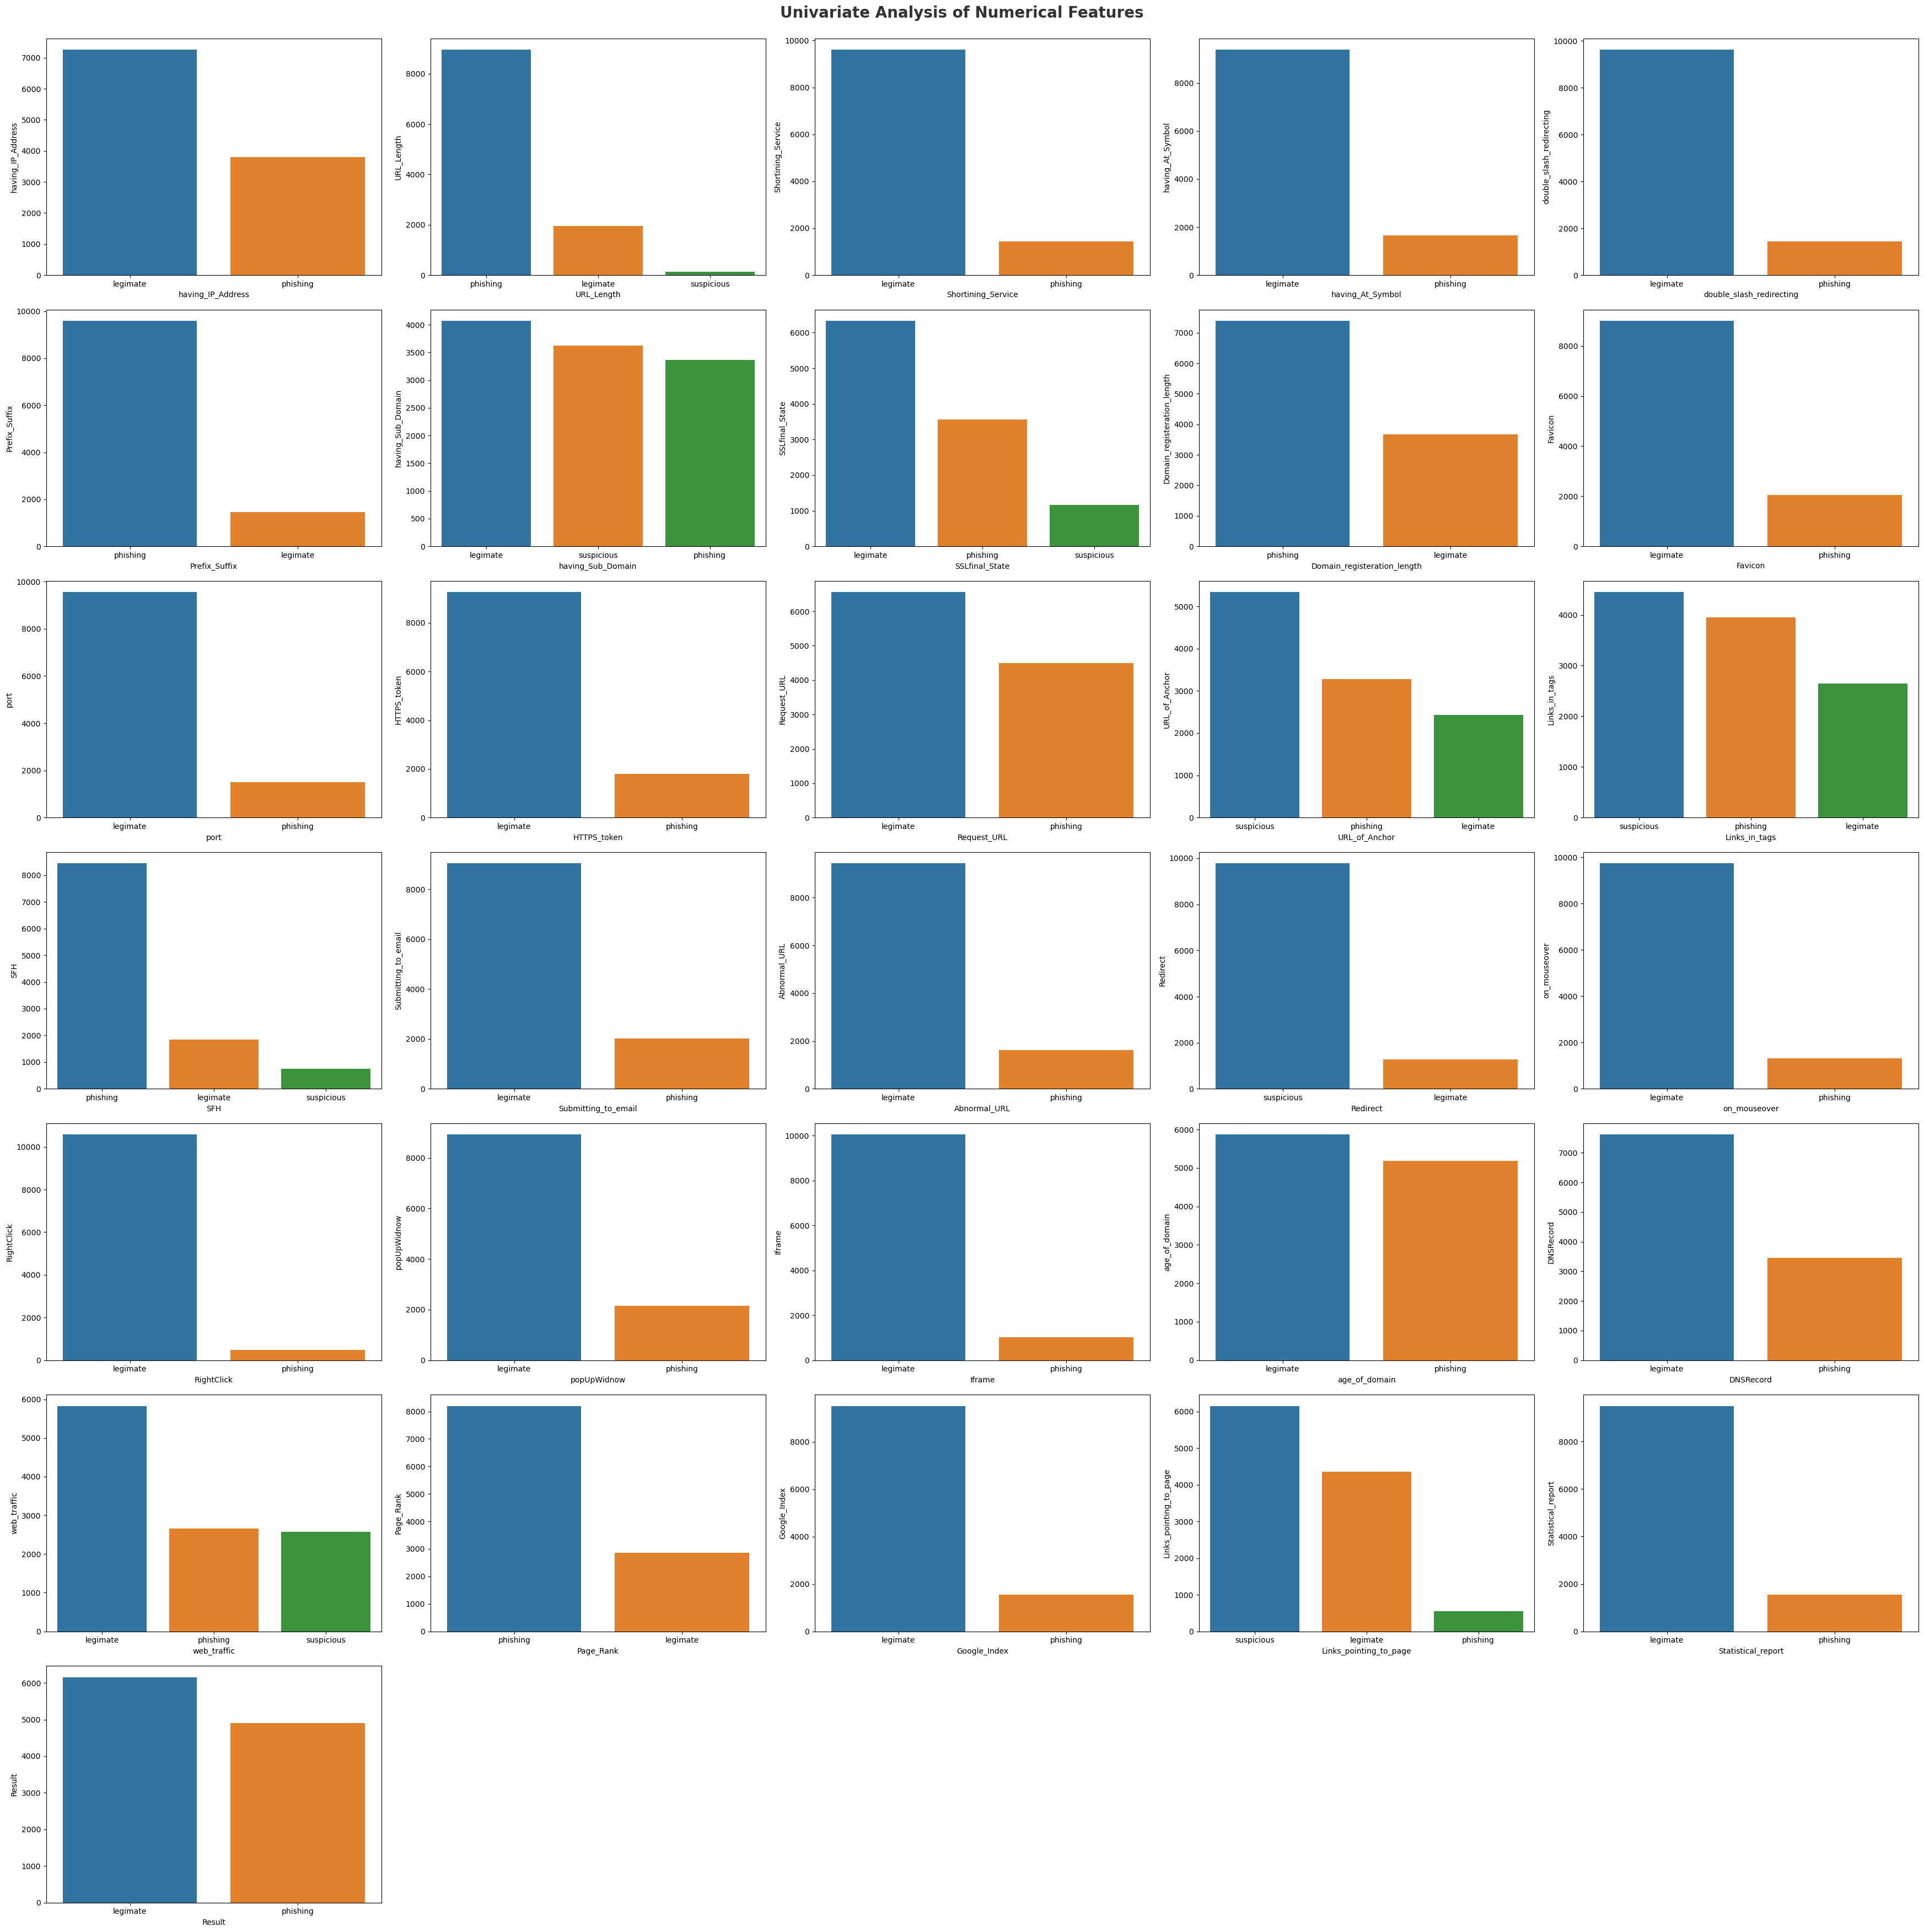

In [371]:
plt.figure(figsize=(35, 35))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

i=1
for c in col:
    plt.subplot(7,5,i)
    gr = pd.Series(df[c].value_counts())    
    key = lambda k: "legimate" if(k == 1) \
            else "suspicious"  if (k == 0) else "phishing" 

    list_of_key = list(map(key,gr.index))
    sns.barplot(x= list_of_key, y=gr)
    plt.xlabel(c)
    plt.tight_layout()
    i = i+1 #next plot count